In [43]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [131]:
img = cv2.imread('B.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,100,200)
rows,cols = img.shape
print(rows, cols)

390 520


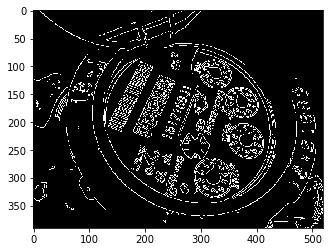

In [132]:
plt.imshow(edges, cmap='gray')
plt.show()

In [106]:
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows, ncols)

240 320


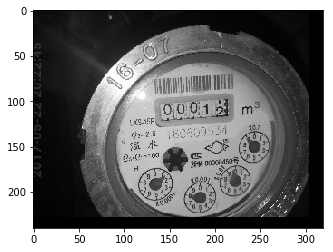

In [107]:
nimg = cv2.copyMakeBorder(img, 0, nrows-rows, 0, ncols-cols, cv2.BORDER_CONSTANT, value=0)
plt.imshow(nimg, cmap='gray')
plt.show()

In [108]:
def shift_dft(src, dst=None):
    '''
        Rearrange the quadrants of Fourier image so that the origin is at
        the image center. Swaps quadrant 1 with 3, and 2 with 4.
        src and dst arrays must be equal size & type
    '''

    if dst is None:
        dst = np.empty(src.shape, src.dtype)
    elif src.shape != dst.shape:
        raise ValueError("src and dst must have equal sizes")
    elif src.dtype != dst.dtype:
        raise TypeError("src and dst must have equal types")

    if src is dst:
        ret = np.empty(src.shape, src.dtype)
    else:
        ret = dst

    h, w = src.shape[:2]

    cx1 = cx2 = int(w/2)
    cy1 = cy2 = int(h/2)

    # if the size is odd, then adjust the bottom/right quadrants
    if w % 2 != 0:
        cx2 += 1
    if h % 2 != 0:
        cy2 += 1

    # swap quadrants

    # swap q1 and q3
    ret[h-cy1:, w-cx1:] = src[0:cy1 , 0:cx1 ]   # q1 -> q3
    ret[0:cy2 , 0:cx2 ] = src[h-cy2:, w-cx2:]   # q3 -> q1

    # swap q2 and q4
    ret[0:cy2 , w-cx2:] = src[h-cy2:, 0:cx2 ]   # q2 -> q4
    ret[h-cy1:, 0:cx1 ] = src[0:cy1 , w-cx1:]   # q4 -> q2

    if src is dst:
        dst[:,:] = ret

    return dst

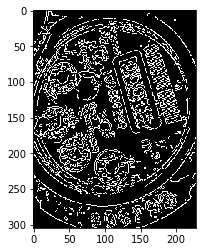

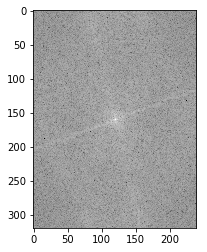

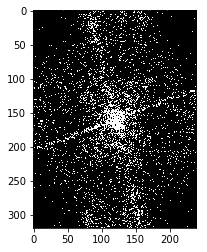

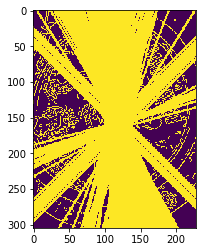

In [322]:
im = cv2.imread('A.jpg')

# convert to grayscale
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im = cv2.Canny(im,100,200)

plt.imshow(im, cmap='gray')
plt.show()

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(29, 20))
# di = cv2.dilate(im,kernel,3) 

# im = cv2.erode(di,kernel)
# plt.imshow(im)
# plt.show()

h, w = im.shape[:2]

realInput = im.astype(np.float64)

# perform an optimally sized dft
dft_M = cv2.getOptimalDFTSize(w)
dft_N = cv2.getOptimalDFTSize(h)

# copy A to dft_A and pad dft_A with zeros
dft_A = np.zeros((dft_N, dft_M, 2), dtype=np.float64)
dft_A[:h, :w, 0] = realInput

# no need to pad bottom part of dft_A with zeros because of
# use of nonzeroRows parameter in cv2.dft()
cv2.dft(dft_A, dst=dft_A, nonzeroRows=h)

# Split fourier into real and imaginary parts
image_Re, image_Im = cv2.split(dft_A)

# Compute the magnitude of the spectrum Mag = sqrt(Re^2 + Im^2)
magnitude = cv2.sqrt(image_Re**2.0 + image_Im**2.0)

# Compute log(1 + Mag)
log_spectrum = cv2.log(1.0 + magnitude)

# normalize and display the results as rgb
cv2.normalize(log_spectrum, log_spectrum, 0.0, 255.0, cv2.NORM_MINMAX)

# Rearrange the quadrants of Fourier image so that the origin is at
# the image center
shift_dft(log_spectrum, log_spectrum)

plt.imshow(log_spectrum, cmap='gray')
plt.show()

_, binary = cv2.threshold(log_spectrum, 170, 255, cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray')
plt.show()

enhanced_im  = np.array(binary, np.uint8)
lines = cv2.HoughLines(enhanced_im,1,np.pi/180,75)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(im,(x1,y1),(x2,y2),(255,255,255),2)
    
plt.imshow(im)
plt.show()

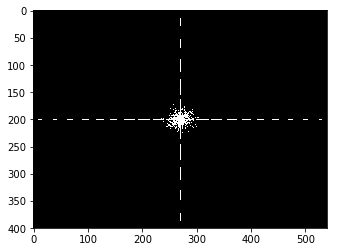

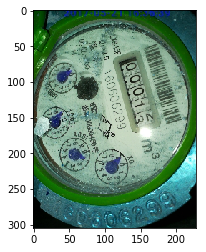

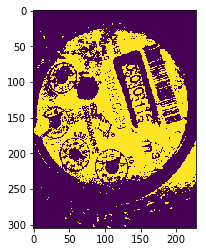

[[[   6.            2.3561945 ]]

 [[   4.            2.3561945 ]]

 [[   8.            2.3561945 ]]

 ..., 
 [[ 265.            1.32645023]]

 [[ 260.            1.37881005]]

 [[ 153.            2.1991148 ]]]


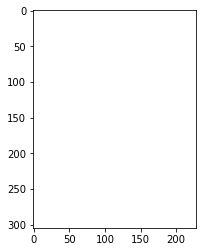

In [260]:
img = cv2.imread('A.jpg')
im = img.copy()

plt.imshow(im)
plt.show()

# convert to grayscale
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

_, im = cv2.threshold(im, 150, 255, cv2.THRESH_BINARY)
plt.imshow(binary)
plt.show()

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10))


# im = cv2.erode(binary,kernel)
# im = cv2.dilate(im,kernel) 
# plt.imshow(im)
# plt.show()


# im = cv2.Canny(im,100,200)
# plt.imshow(im)
# plt.show()

lines = cv2.HoughLines(im,1,np.pi/180,40)
print(lines)

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
    
plt.imshow(img)
plt.show()